# Finetune your Neural Network

**Exercise objectives:**
- `Finetune` the model optimizer
- `Save` and `Load` a `trained neural network`

<hr>

Now that you have solid foundations of what Neural Networks, how to design their architecture and how to regularize them, let's take a closer look at the `.compile(loss = ..., metrics = ..., activation = ...)` part.

# Data

We will use the data from the `Boston Housing dataset`. 

Our goal is to `predict the values of the houses` (in k USD), and we will measure our models' performances  using the `Mean Absolute Error` metrics

In [15]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Count'>

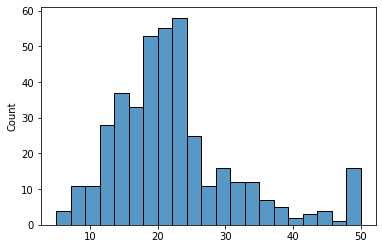

In [16]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape
sns.histplot(y_train)

In [14]:
#pd.DataFrame(X_train).info()
#pd.DataFrame(X_train).describe()

❓ **Question** ❓ Standardize `X_train` and `X_test` set without data leakage, and replace them keeping similar variable names

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your dumb prediction corresponds to the mean value of $y$ computed on the train set?

In [18]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

dummy_reg = DummyRegressor(strategy = "mean")
dummy_reg = dummy_reg.fit(X_train, y_train)

In [19]:
MAE_dummy = cross_val_score(dummy_reg, X_train, y_train, cv=10, scoring="neg_mean_absolute_error", n_jobs=2)
print("Mean MAE: ", -np.mean(MAE_dummy).round(6), "\tStd: ", np.std(MAE_dummy).round(6))

Mean MAE:  6.662596 	Std:  1.220317


In [20]:
MAE_dummy = cross_val_score(dummy_reg, X_test, y_test, cv=10, scoring="neg_mean_absolute_error", n_jobs=2)
print("Mean MAE: ", -np.mean(MAE_dummy).round(6), "\tStd: ", np.std(MAE_dummy).round(6))

Mean MAE:  6.731623 	Std:  1.995709


# 1. The model

❓ **Question** ❓ Now, write a function `initialize_model` that generates a neural network with 3 layers: 
- a layer with 10 neurons and the `relu` activation function (choose the appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def initialize_model():
    model = Sequential() 
    model.add(Dense(10, input_dim=13, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(1, activation='relu'))
    
    
    return model


# 2. The optimizer

❓ **Question** ❓ Write a function that :
* takes as arguments a model and an optimizer, 
* `compiles` the model,
* and returns the compiled model

Please select the `loss function` to be optimized and  the `metrics` on which the model should be evaluated wisely.

In [22]:
def compile_model(model, optimizer_name, loss_name):
    model.compile(loss=loss_name, optimizer=optimizer_name, metrics= ['mae'])
    
    return model
  

❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. 
- Evaluate your model using an Early Stopping criterion.

In [26]:
from tensorflow.keras.callbacks import EarlyStopping


es = EarlyStopping(patience=10, restore_best_weights=True)
model= initialize_model()
compile_model(model, 'adam','mse')
history = model.fit(X_train, y_train, batch_size=16, epochs=250, validation_split=0.3,callbacks=[es], verbose=1)
#res = model.evaluate(X_test, y_test)[1]


Epoch 1/250
18/18 [==============================] - 1s 12ms/step - loss: 531.3659 - mae: 21.2051 - val_loss: 608.6526 - val_mae: 22.3383
Epoch 2/250
18/18 [==============================] - 0s 4ms/step - loss: 519.2925 - mae: 20.8403 - val_loss: 594.3311 - val_mae: 21.9267
Epoch 3/250
18/18 [==============================] - 0s 6ms/step - loss: 506.7149 - mae: 20.4371 - val_loss: 579.6264 - val_mae: 21.5044
Epoch 4/250
18/18 [==============================] - 0s 4ms/step - loss: 493.2302 - mae: 20.0297 - val_loss: 563.6766 - val_mae: 21.0386
Epoch 5/250
18/18 [==============================] - 0s 5ms/step - loss: 478.9294 - mae: 19.5796 - val_loss: 545.7208 - val_mae: 20.5226
Epoch 6/250
18/18 [==============================] - 0s 5ms/step - loss: 462.3747 - mae: 19.0855 - val_loss: 526.7964 - val_mae: 19.9995
Epoch 7/250
18/18 [==============================] - 0s 6ms/step - loss: 444.8071 - mae: 18.5469 - val_loss: 505.4683 - val_mae: 19.4070
Epoch 8/250
18/18 [=====================

❓ **Question** ❓ Re-run the same model on the same data using different optimizers (in a `for` loop). 

For each optimizer, plot the history and report the corresponding Mean Absolute Error. (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)), as well as the time it took to fit your Neural Net.

In [41]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=None)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=None)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=None)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=None)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 569.3371 - mae: 22.1047
MAE with the Adadelta optimizer: 22.1047  reached in 30 s after 500 epochs


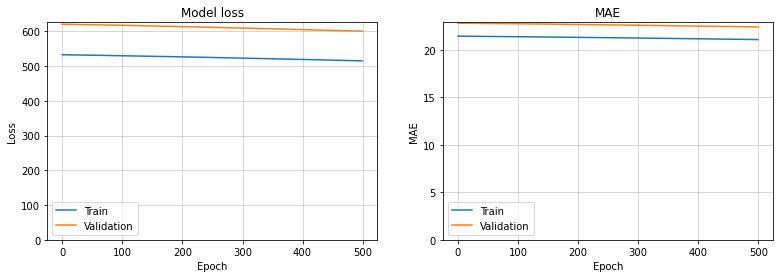

4/4 [==============================] - 0s 2ms/step - loss: 357.4478 - mae: 16.8984
MAE with the Adagrad optimizer: 16.8984  reached in 26 s after 500 epochs


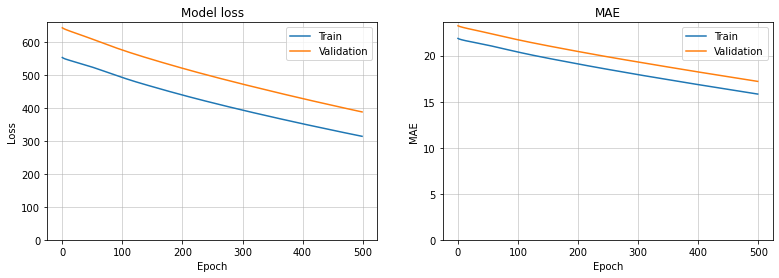

4/4 [==============================] - 0s 2ms/step - loss: 23.1516 - mae: 2.9656
MAE with the Adam optimizer: 2.9656  reached in 14 s after 236 epochs


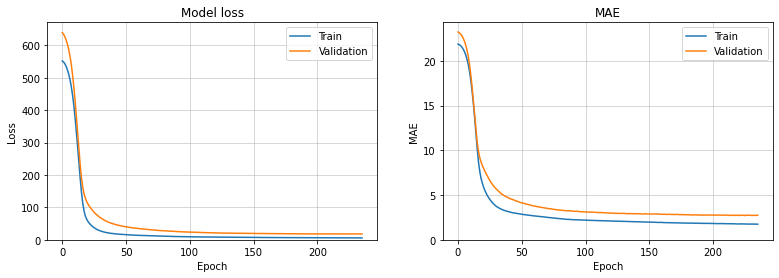

4/4 [==============================] - 0s 2ms/step - loss: 18.6564 - mae: 2.7635
MAE with the Adamax optimizer: 2.7635  reached in 24 s after 500 epochs


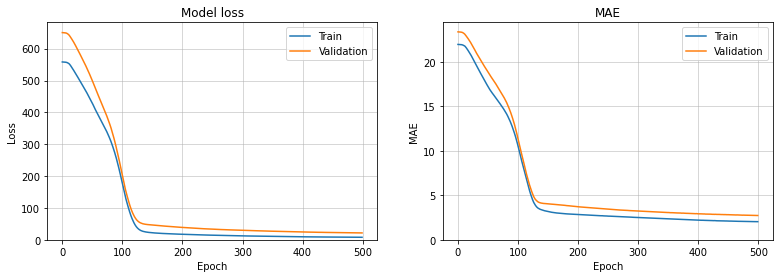

4/4 [==============================] - 0s 2ms/step - loss: 280.4828 - mae: 14.2359
MAE with the Ftrl optimizer: 14.2359  reached in 25 s after 500 epochs


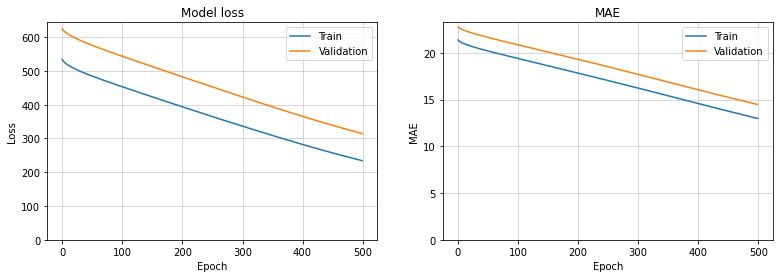

4/4 [==============================] - 0s 2ms/step - loss: 19.8298 - mae: 2.8841
MAE with the Nadam optimizer: 2.8841  reached in 24 s after 454 epochs


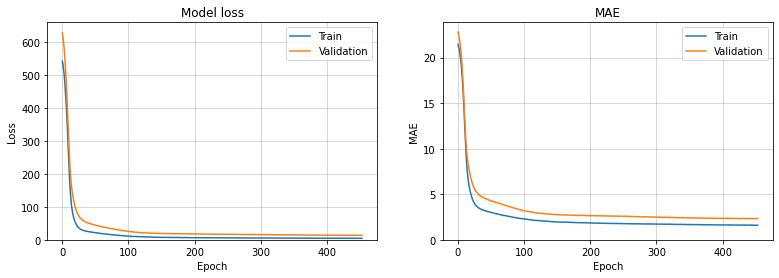

4/4 [==============================] - 0s 2ms/step - loss: 24.8343 - mae: 3.1314
MAE with the RMSprop optimizer: 3.1314  reached in 11 s after 197 epochs


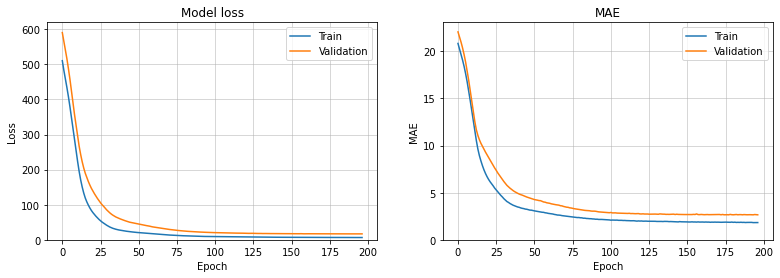

4/4 [==============================] - 0s 2ms/step - loss: 21.4864 - mae: 3.6043
MAE with the SGD optimizer: 3.6043  reached in 2 s after 30 epochs


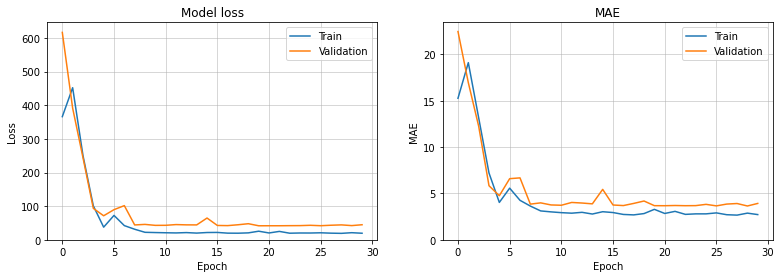

In [31]:
import time

for optimizer in ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Ftrl', 'Nadam', 'RMSprop', 'SGD']:
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer, 'mse')

    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, batch_size=16, epochs=500, validation_split=0.3, callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

❓ **Question** ❓ Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

❗ **Remark** ❗ 
- Here, the optimizer is may not be central as the data are in low dimensions and and there are not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 

- Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer relies on. Among this hyperparameters, there is quite an important one, the **`learning rate`**. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instantiate it with a learning rate of $0.1$ - keep the other values to their default values. Use this optimizer in the `compile_model` function, fit the data and plot the history

4/4 [==============================] - 0s 3ms/step - loss: 19.1584 - mae: 2.9068
MAE with the Adam optimizer  reached in 3 s after 35 epochs


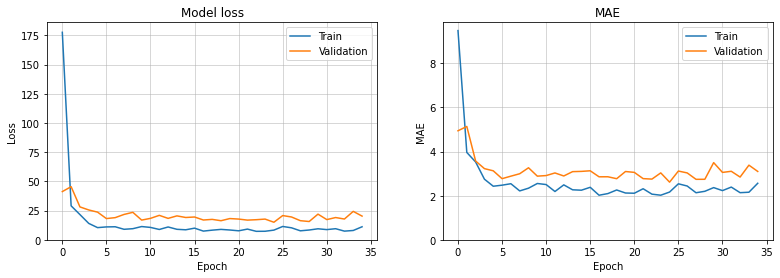

In [33]:
# YOUR CODE HERE
from tensorflow.keras.optimizers import Adam
start_time = time.time()
model= initialize_model()
compile_model(model, Adam(learning_rate=0.1), 'mse')

es = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, batch_size=16, epochs=500, validation_split=0.3,callbacks=[es], verbose=0)
res = model.evaluate(X_test, y_test)[1]
end_time = time.time()
print(f'MAE with the Adam optimizer  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')  
plot_loss_mae(history)

❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

*Remark*: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

4/4 [==============================] - 0s 3ms/step - loss: 51.4269 - mae: 5.5219
learning rate0.0001 optimizer: 5.5219  reached in 31 s after 500 epochs


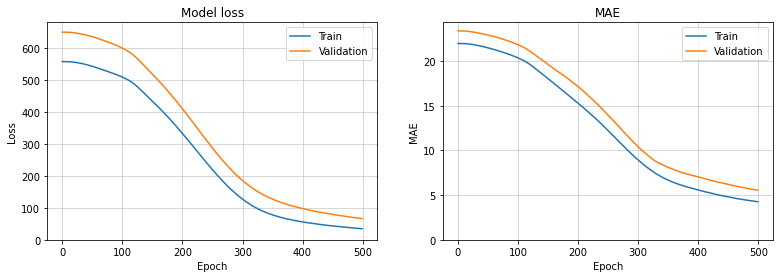

4/4 [==============================] - 0s 2ms/step - loss: 615.8578 - mae: 23.0784
learning rate0.001 optimizer: 23.0784  reached in 1 s after 11 epochs


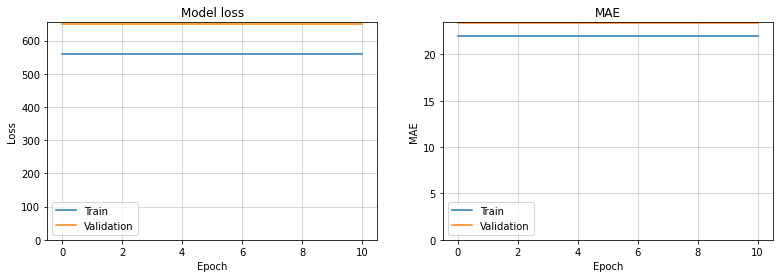

4/4 [==============================] - 0s 2ms/step - loss: 19.2209 - mae: 2.9056
learning rate0.01 optimizer: 2.9056  reached in 8 s after 118 epochs


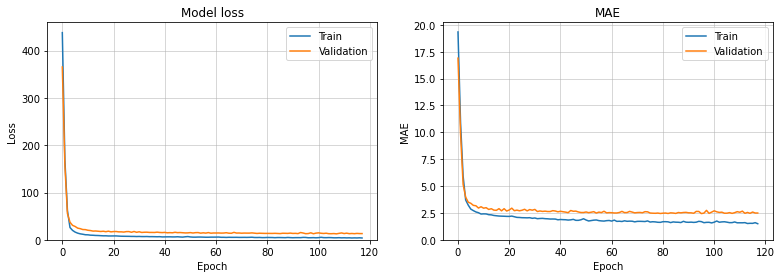

4/4 [==============================] - 0s 2ms/step - loss: 21.9871 - mae: 2.9266
learning rate0.1 optimizer: 2.9266  reached in 3 s after 32 epochs


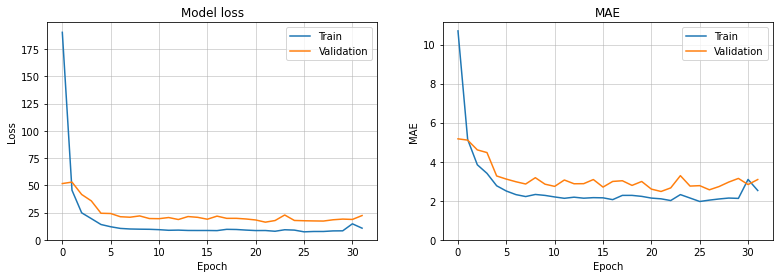

4/4 [==============================] - 0s 2ms/step - loss: 615.8578 - mae: 23.0784
learning rate1 optimizer: 23.0784  reached in 1 s after 11 epochs


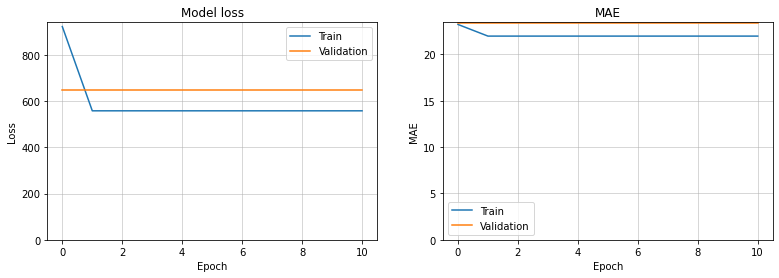

4/4 [==============================] - 0s 2ms/step - loss: 615.8578 - mae: 23.0784
learning rate5 optimizer: 23.0784  reached in 2 s after 11 epochs


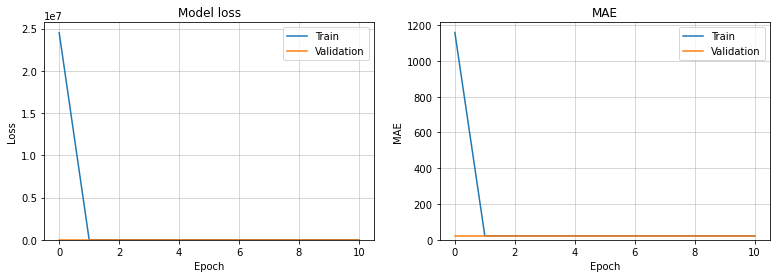

In [35]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]

for lr in learning_rates:
    start_time = time.time()
    model= initialize_model()
    compile_model(model, Adam(learning_rate=lr), 'mse')

    es = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, batch_size=16, epochs=500, validation_split=0.3,callbacks=[es], verbose=0)
    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()
    
    print(f'learning rate{lr} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')   
    plot_loss_mae(history)
 
   

# 3. The loss

⚠️ It is important to **clearly understand the different between metrics and losses**. 

* The `loss functions` are computed *during* the training procedure
* The `metrics` are computed *after* training your models !
* Some metrics can be used as loss functions too... as long as they are differentiable ! (e.g. the *MSE*)

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  

In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

4/4 [==============================] - 0s 2ms/step - loss: 19.3478 - mae: 2.8182
learning rate 0.01 optimizer: 2.8182  reached in 4 s after 49 epochs


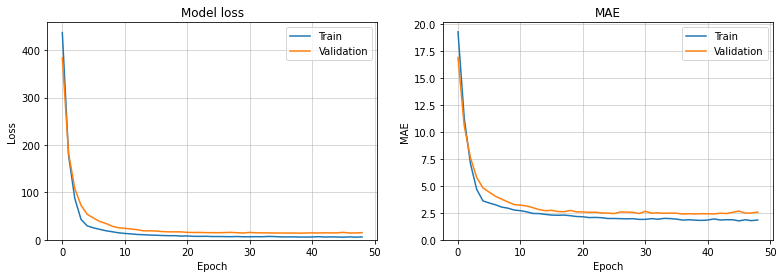

In [43]:
lr=0.01
start_time = time.time()
model= initialize_model()
compile_model(model, Adam(learning_rate=lr), 'mse')

es = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=16, epochs=500, validation_split=0.3,callbacks=[es], verbose=0)
res = model.evaluate(X_test, y_test)[1]
end_time = time.time()

print(f'learning rate {lr} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')   
plot_loss_mae(history)

4/4 [==============================] - 0s 3ms/step - loss: 3.0442 - mae: 3.0442
learning rate 0.01 optimizer: 3.0442  reached in 3 s after 28 epochs


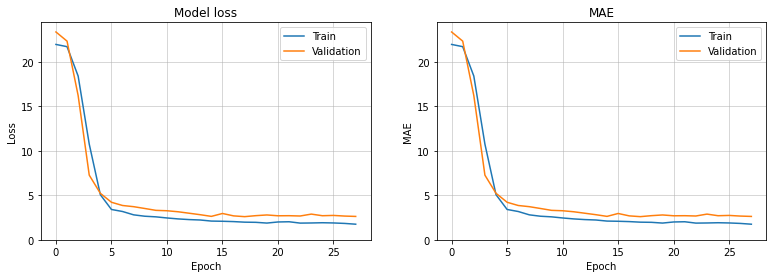

In [44]:
lr=0.01
start_time = time.time()
model= initialize_model()
compile_model(model, Adam(learning_rate=lr), 'mae')

es = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=16, epochs=500, validation_split=0.3,callbacks=[es], verbose=0)
res = model.evaluate(X_test, y_test)[1]
end_time = time.time()

print(f'learning rate {lr} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')   
plot_loss_mae(history)

❗️ Countrary to first intuition, it can be sometimes better to use the MSE as the loss function in order to get the best MAE possible in the end!

<details>
    <summary>▶ Why?</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

### 🧪 Test your model best performance

❓ Save your best model performance on the test set at `mae_test` and check it out below

In [9]:
lr = 0.005
loss_metric = 'mse'
model = initialize_model()
model.compile(optimizer=Adam(learning_rate=lr), loss=loss_metric, metrics=['mean_absolute_error'])
es = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=10)
history = model.fit(X_train, y_train, batch_size=20, epochs=500, validation_split=0.3, callbacks=[es], verbose=0)
res = model.evaluate(X_test, y_test)[1]
print(f'MSE with the {lr} learning rate: {res:.4f} after {len(history.epoch)} epochs')
plot_loss_mae(history)

# 4 : Save and load a model

❓ **Question** ❓  Save your model using `.save_model(model, 'name_of_my_model')` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model)..

❓ **Question** ❓ Now, in a variable that you will call `loaded_model`, load the model you just saved thanks to `.load_model('name_of_your_model')` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to check that it gives the same result as before.

## (Optional) `Exponential Decay` for the Optimizer's Learning Rate

The next question is not essential and can be skipped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need large learning rates, and as the neural network converges and get closer to the minimum loss value, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question** ❓ Use the [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the `adam` optimizer and run it on the previous data. Start with the following:

```python
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=5000, decay_rate=0.7,
)
```

In [11]:
# YOUR CODE HERE